# 机器学习大作业
##      ——基于卷积神经网络的交通标志识别
### 数据科学2班   耿浩诚

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D , MaxPooling2D 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.optimizers import Adam
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# 定义路径
dataset_directory = './GTSRB'
train_path = './GTSRB/Train'

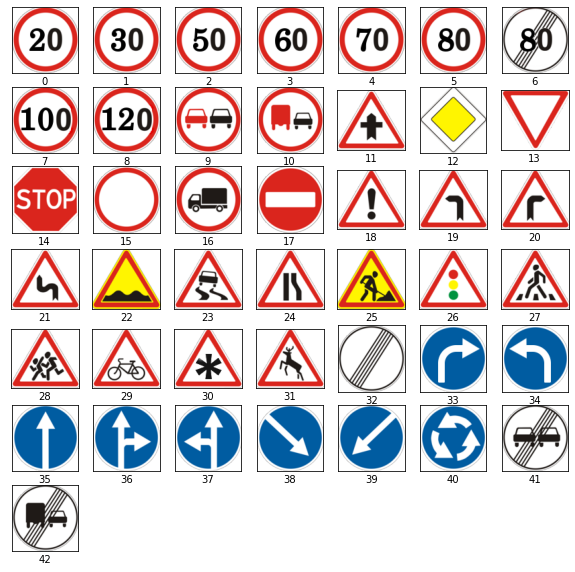

In [3]:
plt.figure(figsize=(10, 10))
for i in range (0,43):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    path = dataset_directory + "/Meta/{0}.png".format(i)
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(i)

In [4]:
# 将图片数据加载转化为数字数据并查看数据维度
image_data = []
image_labels = []

for i in range(43):
    path = dataset_directory + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_f = Image.fromarray(image, 'RGB')
            size_image = image_f.resize((30, 30))
            image_data.append(np.array(size_image))
            image_labels.append(i)
        except:
            print("Error in " + img)


image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)


(39209, 30, 30, 3) (39209,)


In [5]:
# 打乱数据顺序
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [6]:
# 划分数据集（70%训练集，30%测试集）
X_train, X_test, y_train, y_test = train_test_split(image_data, 
                                                  image_labels, 
                                                  test_size=0.3, 
                                                  random_state=42, 
                                                  shuffle=True)

X_train = X_train/255 
X_test = X_test/255

print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)

X_train.shape (27446, 30, 30, 3)
X_test.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_test.shape (11763,)


In [7]:
y_train = keras.utils.to_categorical(y_train, 43)
y_test = keras.utils.to_categorical(y_test, 43)

print(y_train.shape)
print(y_test.shape)

(27446, 43)
(11763, 43)


In [8]:
# LeNet-5
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(30,30,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Normalization())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(43, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 normalization (Normalizatio  (None, 6, 6, 64)         129       
 n)                                                              
                                                        

In [9]:
# 训练
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [10]:
# 模型拟合
fitted = model.fit(X_train, y_train, 
                    batch_size=64, 
                    epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
429/429 [==============================] - 14s 32ms/step - loss: 1.4625 - accuracy: 0.5730 - val_loss: 0.3278 - val_accuracy: 0.9100
Epoch 2/10
429/429 [==============================] - 14s 32ms/step - loss: 0.2966 - accuracy: 0.9091 - val_loss: 0.1184 - val_accuracy: 0.9685
Epoch 3/10
429/429 [==============================] - 14s 32ms/step - loss: 0.1469 - accuracy: 0.9573 - val_loss: 0.0625 - val_accuracy: 0.9829
Epoch 4/10
429/429 [==============================] - 14s 32ms/step - loss: 0.0988 - accuracy: 0.9692 - val_loss: 0.0497 - val_accuracy: 0.9859
Epoch 5/10
429/429 [==============================] - 14s 32ms/step - loss: 0.0700 - accuracy: 0.9790 - val_loss: 0.0469 - val_accuracy: 0.9879
Epoch 6/10
429/429 [==============================] - 14s 32ms/step - loss: 0.0631 - accuracy: 0.9809 - val_loss: 0.0430 - val_accuracy: 0.9901
Epoch 7/10
429/429 [==============================] - 14s 33ms/step - loss: 0.0514 - accuracy: 0.9844 - val_loss: 0.0278 - val_accuracy:

In [11]:
# 使用字典定义每个路标的名字
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [12]:
test = pd.read_csv(dataset_directory + '/Test.csv')

labels = test["ClassId"].values

imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(dataset_directory + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((30, 30))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255


predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
from sklearn.metrics import accuracy_score
print('Test accuracy: ',accuracy_score(labels, classes_x)*100)

Test accuracy:  95.09105304829771


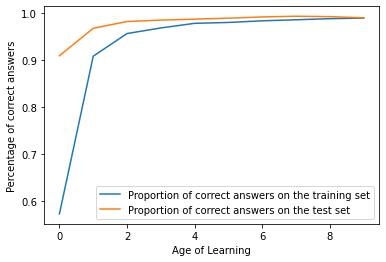

In [13]:
# 准确度变化曲线
plt.plot(fitted.history['accuracy'], 
         label='Proportion of correct answers on the training set')
plt.plot(fitted.history['val_accuracy'], 
         label='Proportion of correct answers on the test set')
plt.xlabel('Age of Learning')
plt.ylabel('Percentage of correct answers')
plt.legend()
plt.show()

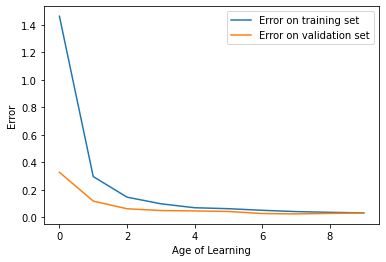

In [14]:
# 误差变化曲线
plt.plot(fitted.history['loss'], 
         label='Error on training set')
plt.plot(fitted.history['val_loss'], 
         label='Error on validation set')
plt.xlabel('Age of Learning')
plt.ylabel('Error')
plt.legend()
plt.show()

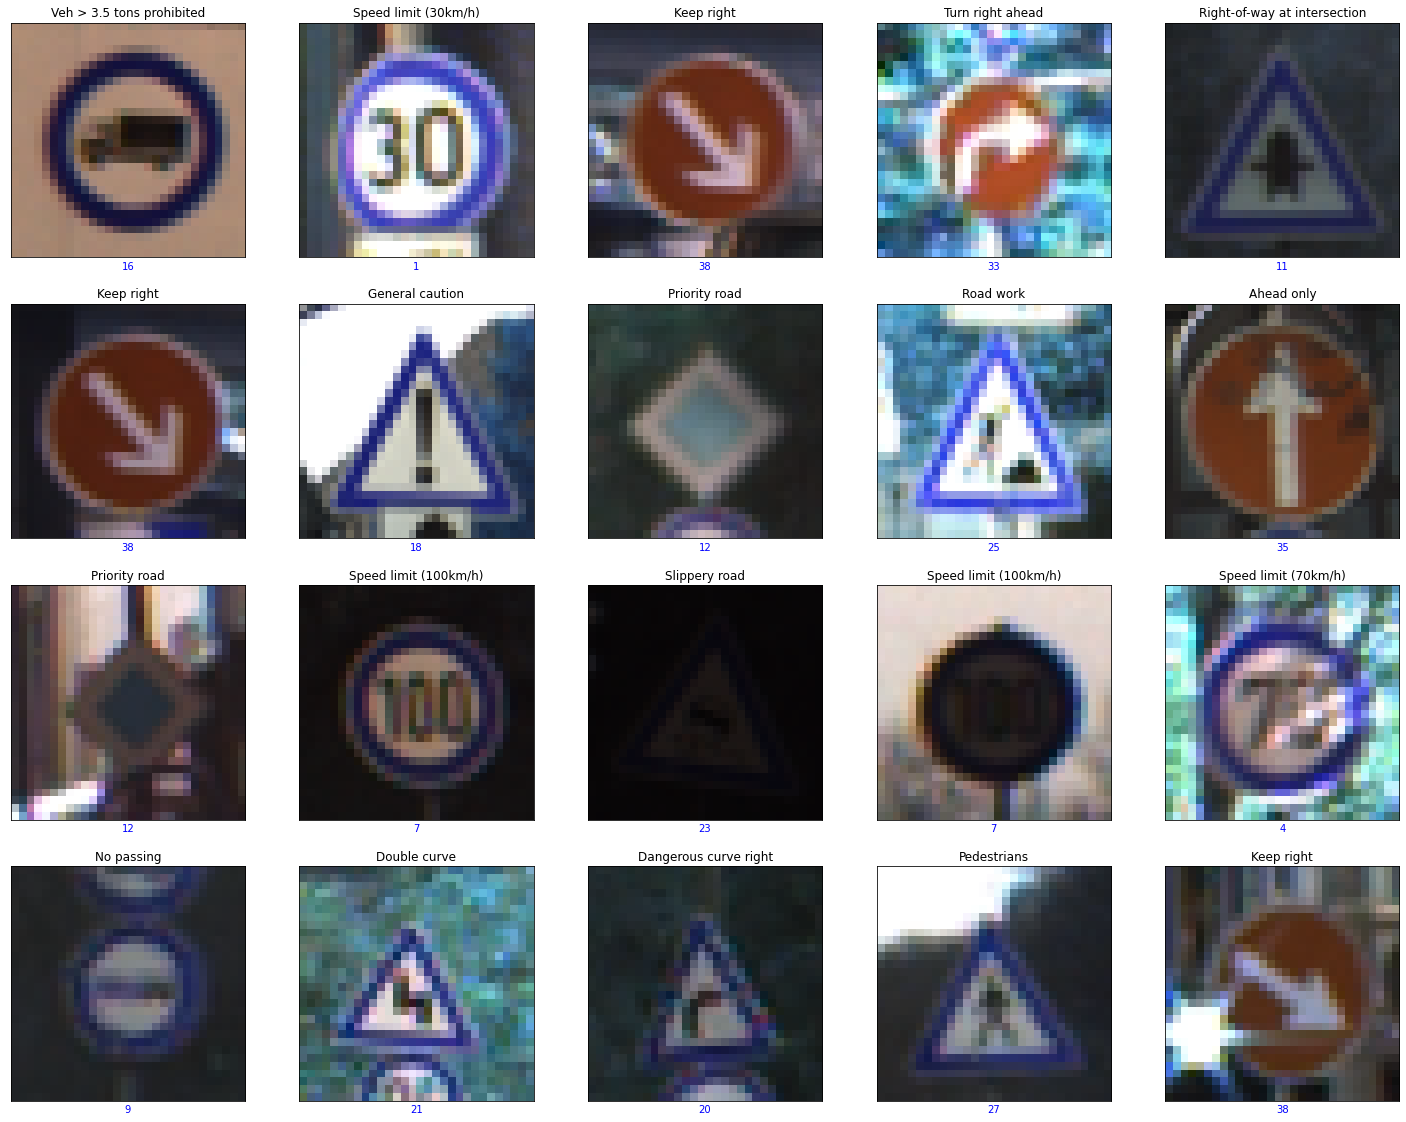

In [15]:
# 画出预测结果对应的图
plt.figure(figsize = (25, 25))
start_index = 0
for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = classes_x[start_index + i]
    actual = labels[start_index + i]
    col = 'b'
    if prediction != actual:
        col = 'r'
    plt.xlabel(prediction, color = col)
    plt.title(classes[labels[i]])
    plt.imshow(X_test[start_index + i])
plt.show()